<a href="https://colab.research.google.com/github/SaifuliAnna/DataScience_HW10/blob/main/HW_10(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist

from keras.optimizers import Adam, RMSprop

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics

In [ ]:
from keras.layers.regularization.dropout import Dropout
from keras.backend import dropout
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Завантаження набору даних Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the dimensions of the dataset
print('Train: X = ', x_train.shape)
print('Test: X = ', x_test.shape)


Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


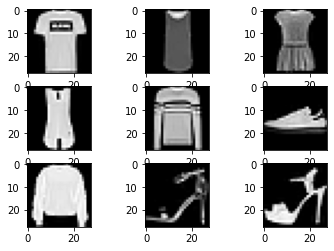

In [ ]:
for i in range(1, 10):
	# Create a 3x3 grid and place the
	# image in ith position of grid
	plt.subplot(3, 3, i)
	# Insert ith image with the color map 'grap'
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# Створення моделі (Побудова моделі нейронної мережі)
model = Sequential([
    Conv2D(64, (5, 5), padding="same",
					activation="relu",
					input_shape=(28, 28, 1)),

    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (5, 5), padding="same",
					activation="relu"),

    MaxPooling2D(pool_size=(2, 2)),
	  Conv2D(256, (5, 5), padding="same",
					activation="relu"),
	
	  MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    # Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu', name = 'hidden_1'),
		Dropout(0.5),

    Dense(10, activation='softmax', name = 'output')
])

In [ ]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])


In [ ]:
# Навчання моделі
history = model.fit(
	x_train.astype(np.float32), y_train.astype(np.float32),
	epochs=22,
	steps_per_epoch=70,
	validation_split=0.33
)

Epoch 1/22
70/70 [==============================] - 20s 94ms/step - loss: 2.9791 - sparse_categorical_accuracy: 0.6558 - val_loss: 0.4271 - val_sparse_categorical_accuracy: 0.8489
Epoch 2/22
70/70 [==============================] - 6s 83ms/step - loss: 0.4589 - sparse_categorical_accuracy: 0.8409 - val_loss: 0.3448 - val_sparse_categorical_accuracy: 0.8764
Epoch 3/22
70/70 [==============================] - 6s 84ms/step - loss: 0.3826 - sparse_categorical_accuracy: 0.8650 - val_loss: 0.3105 - val_sparse_categorical_accuracy: 0.8883
Epoch 4/22
70/70 [==============================] - 6s 84ms/step - loss: 0.3403 - sparse_categorical_accuracy: 0.8822 - val_loss: 0.3040 - val_sparse_categorical_accuracy: 0.8871
Epoch 5/22
70/70 [==============================] - 5s 79ms/step - loss: 0.3084 - sparse_categorical_accuracy: 0.8921 - val_loss: 0.2791 - val_sparse_categorical_accuracy: 0.8998
Epoch 6/22
70/70 [==============================] - 6s 84ms/step - loss: 0.2832 - sparse_categorical_acc

In [ ]:
# Оцінка моделі на тестових даних 
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3346 - sparse_categorical_accuracy: 0.9142
Test accuracy: 0.9142000079154968


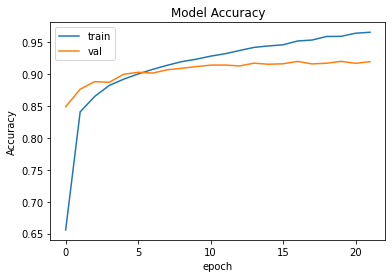

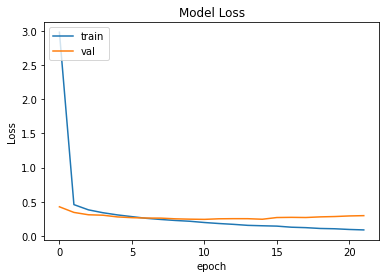

In [ ]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('./model_w.h5', overwrite=True)

In [ ]:
model.save("my_model_3")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Існує кілька способів покращити модель, яку ми створили раніше для класифікації зображень з Fashion MNIST. Ось кілька рекомендацій:

    Додайте більше прихованих шарів або збільшіть кількість нейронів в прихованих шарах. Це дозволить моделі отримати більше інформації про зображення та здатність більш точно класифікувати їх.

    Використовуйте інші функції активації в прихованих шарах, наприклад, leaky ReLU, sigmoid або tanh. Ви можете спробувати різні функції активації та порівняти їх результати.

    Використовуйте метод Dropout для зменшення перенавчання (overfitting) моделі. Dropout випадковим чином вимикає нейрони в прихованих шарах під час навчання, що дозволяє моделі вивчати більш узагальнені ознаки зображень.

    Збільшіть кількість епох навчання або використовуйте різні методи навчання, наприклад, пакетне навчання (batch training) або стохастичний градієнтний спуск (stochastic gradient descent).

    Використовуйте передньо навчені моделі, які навчалися на великих наборах даних зображень, наприклад, ResNet, Inception або VGG. Використання передньо навченої моделі дозволить значно покращити точність класифікації зображень.

    Збільшіть розмір зображень, що використовуються для навчання моделі. Якщо зображення збільшуються, модель матиме більше деталей для аналізу та може точніше класифікувати зображення.

Ці рекомендації можна комбінувати для отримання ще кращої моделі. Наприклад, можна додати декілька прихованих шарів, використовувати функці
